In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Jupyter/athlete_events.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Jupyter/noc_regions.csv')

In [5]:
df1

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
df2

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [7]:
df = df1.merge(df2, on='NOC')

In [8]:
modern_sports = df[df['Year'] >= 2000]

In [9]:
modern_sports

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,119487,Likeleli Alinah Thamae,F,22.0,170.0,49.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Flyweight,NaN,Lesotho,NaN
270761,119563,Masempe Theko,F,25.0,NaN,NaN,Lesotho,LES,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN,Lesotho,NaN
270762,120575,Mamorallo Tjoka,F,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,F,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN


In [10]:
# Map gender values to dummy values
modern_sports['Sex'] = modern_sports['Sex'].map({'M': 1, 'F': 0})

<ipython-input-10-4b019ffce860>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_sports['Sex'] = modern_sports['Sex'].map({'M': 1, 'F': 0})


In [11]:
modern_sports

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1,2,A Lamusi,1,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,1,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,1,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN
5,1464,Ai Yanhan,0,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 4 x 200 metres Freestyle Relay,NaN,China,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270760,119487,Likeleli Alinah Thamae,0,22.0,170.0,49.0,Lesotho,LES,2000 Summer,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Flyweight,NaN,Lesotho,NaN
270761,119563,Masempe Theko,0,25.0,NaN,NaN,Lesotho,LES,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 50 metres Freestyle,NaN,Lesotho,NaN
270762,120575,Mamorallo Tjoka,0,23.0,150.0,56.0,Lesotho,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN
270763,120575,Mamorallo Tjoka,0,27.0,150.0,56.0,Lesotho,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,NaN


In [12]:
medalists_df = modern_sports[modern_sports['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

In [13]:
medalists_df.groupby('region')['Medal'].count().sort_values(ascending=False)

region
USA           1631
Russia         945
Germany        824
Australia      695
China          658
              ... 
Sri Lanka        1
Mauritius        1
Mozambique       1
Niger            1
Kosovo           1
Name: Medal, Length: 115, dtype: int64

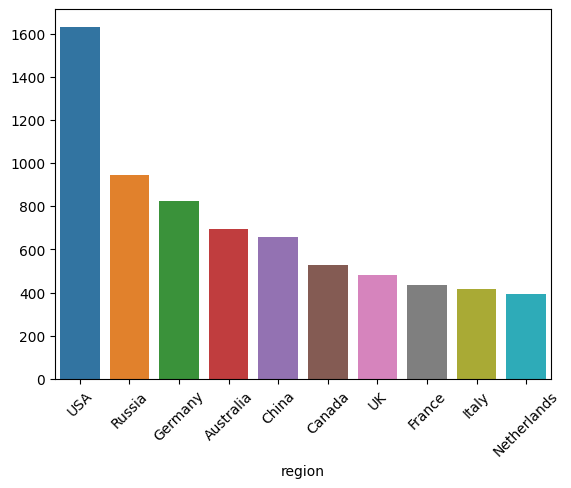

In [16]:
# top countries with most medals
top_countries = medalists_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(x=top_countries.index[:10], y=top_countries.values[:10])
plt.xticks(rotation=45)
plt.show()

In [17]:
top_countries_df = medalists_df[medalists_df['region'].isin(['USA', 'Russia', 'Germany'])]
top_countries_medals_per_year = pd.pivot_table(top_countries_df, values=['ID'],
                                columns=['region'],
                                index=['Year'],
                                aggfunc='count')

In [18]:
top_countries_medals_per_year = top_countries_medals_per_year[top_countries_medals_per_year.index >= 1952]

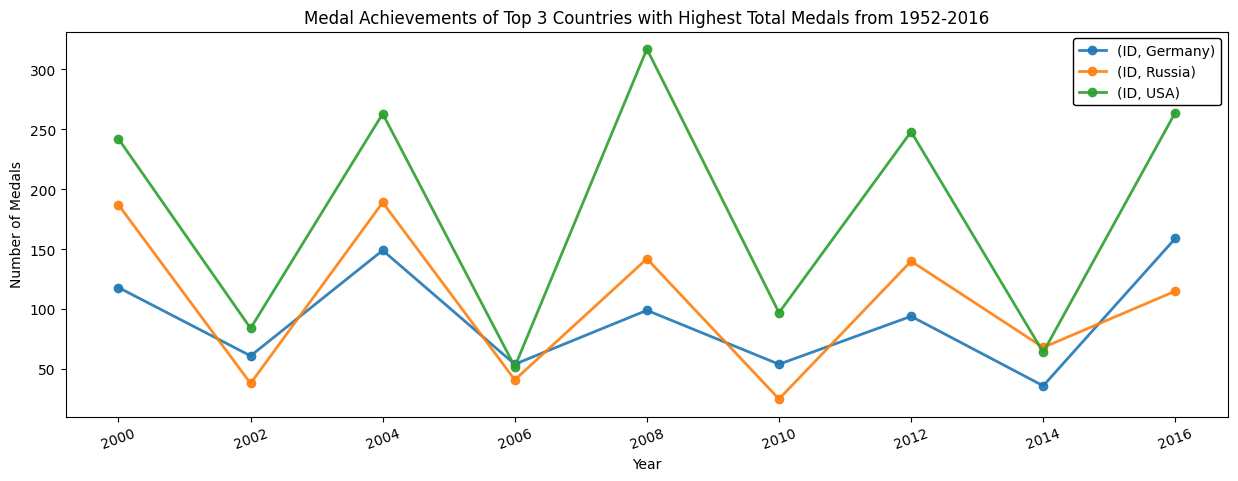

In [19]:
top_countries_medals_per_year.plot(linestyle='-', marker='o', alpha=0.9, figsize=(15,5), linewidth=2)
plt.legend(facecolor='white', framealpha=1, edgecolor='black')
plt.xlabel('Year')
plt.xticks(top_countries_medals_per_year.index)
plt.ylabel('Number of Medals')
plt.title('Medal Achievements of Top 3 Countries with Highest Total Medals from 1952-2016')
plt.xticks(rotation=20)
plt.show()

In [23]:
# List of countries by continent
asia = ['Afghanistan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Timor-Leste',
        'Georgia', 'India', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Japan', 'Kyrgyzstan', 'Kuwait', 'Laos', 'Lebanon',
        'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine',
        'Philippines', 'Qatar', 'Saudi Arabia', 'South Korea', 'Syria', 'Taiwan', 'Sri Lanka', 'Tajikistan', 'Thailand',
         'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen', 'Azerbaijan', 'Indonesia']


europe = ['Albania', 'Andorra', 'Angola', 'Antigua', 'Armenia', 'Austria', 'Azerbaijan',
          'Belgium', 'Bosnia and Herzegovina', 'Belize', 'Belarus', 'Czech Republic', 'Bulgaria',
          'Croatia', 'Cyprus', 'Denmark', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Kosovo', 'Finland',
          'France', 'Georgia', 'Germany', 'Greece', 'Ireland', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
          'Latvia', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
          'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden','Turkey',
          'Switzerland', 'Ukraine', 'UK', 'Macedonia', 'Virgin Islands, British']

africa = ['Angola', 'Algeria', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cape Verde', 'Cameroon',
          'Democratic Republic of the Congo', 'Chad', 'Central African Republic', 'Republic of Congo',
          'Democratic Republic of the Congo', 'Gabon', 'Gambia', 'Ghana', 'Equatorial Guinea', 'Guinea',
          'Guinea-Bissau', 'Morocco', 'Egypt', 'Kenya', 'Libya', 'Mali', 'Senegal', 'Solomon Islands',
          'Somalia', 'South Sudan', 'Tunisia', 'Zimbabwe', 'Zambia', 'Sudan', 'Sierra Leone', 'Comoros',
          'Ivory Coast', 'Djibouti', 'Eritrea', 'Swaziland', 'Ethiopia', 'Lesotho', 'Liberia', 'Madagascar',
          'Malawi', 'Mauritania', 'Mauritius', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda',
          'Sao Tome and Principe', 'Seychelles', 'South Africa', 'Tanzania', 'Togo', 'Uganda']

north_america = ['Antigua', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica',
                 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica',
                  'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts', 'Saint Vincent', 'Saint Lucia', 'Trinidad',
                 'USA', 'Cayman Islands', 'American Samoa', 'Puerto Rico', 'Aruba', 'Bermuda']

south_america = ['Argentina', 'Boliva', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Curacao']

oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand',
           'Palau', 'Papua New Guinea', 'Samoa', 'Tonga', 'Cook Islands', 'Individual Olympic Athletes',
           'Vanuatu', 'nan', 'Guam', 'US']

# Create a new column 'continent' in the 'df' DataFrame and assign continent values
modern_sports['continent'] = pd.np.where(modern_sports['region'].isin(europe), 'Europe',
                pd.np.where(modern_sports['region'].isin(africa), 'Africa',
                pd.np.where(modern_sports['region'].isin(asia), 'Asia',
                pd.np.where(modern_sports['region'].isin(north_america), 'North America',
                pd.np.where(modern_sports['region'].isin(south_america), 'South America',
                pd.np.where(modern_sports['region'].isin(oceania), 'Oceania','unknown')))))  )

<ipython-input-23-ee61d150e739>:39: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  modern_sports['continent'] = pd.np.where(modern_sports['region'].isin(europe), 'Europe',
<ipython-input-23-ee61d150e739>:40: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(modern_sports['region'].isin(africa), 'Africa',
<ipython-input-23-ee61d150e739>:41: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(modern_sports['region'].isin(asia), 'Asia',
<ipython-input-23-ee61d150e739>:42: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.where(modern_sports['region'].isin(north_america), 'North America',
<ipython-input-23-ee61d150e739>:4

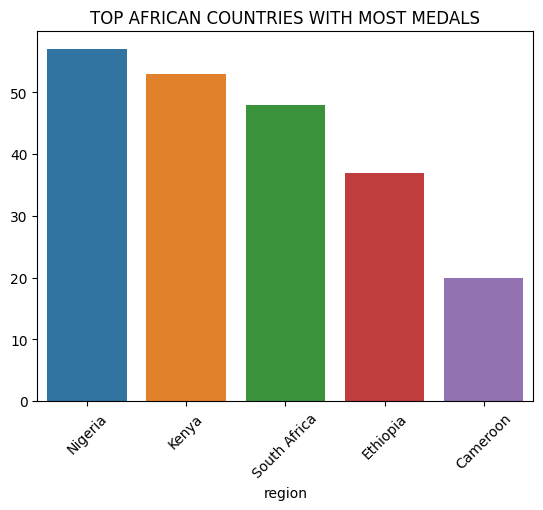

In [27]:
africa_df = modern_sports[modern_sports['continent']== 'Africa'].reset_index(drop=True)
top_african_countries = africa_df.groupby('region')['Medal'].count().sort_values(ascending=False)
sns.barplot(x=top_african_countries.index[:5], y=top_african_countries.values[:5])
plt.xticks(rotation=45)
plt.title('TOP AFRICAN COUNTRIES WITH MOST MEDALS')
plt.show()

In [34]:
top_athletes = medalists_df['Name'].value_counts()

top_athletes_df = medalists_df[medalists_df['Name'].isin(top_athletes.index[:10])]

top_athletes_df = top_athletes_df.reset_index(drop=True)

pivot_table = pd.pivot_table(top_athletes_df, values=['ID'],
                                columns=['Medal'],
                                index=['Name', 'region'],
                                aggfunc='count')
pivot_table.fillna(0, inplace=True)

pivot_table['total'] = pivot_table['ID', 'Gold'] + pivot_table['ID', 'Silver'] + pivot_table['ID', 'Bronze']
pivot_table = pivot_table.sort_values('total', ascending=False)

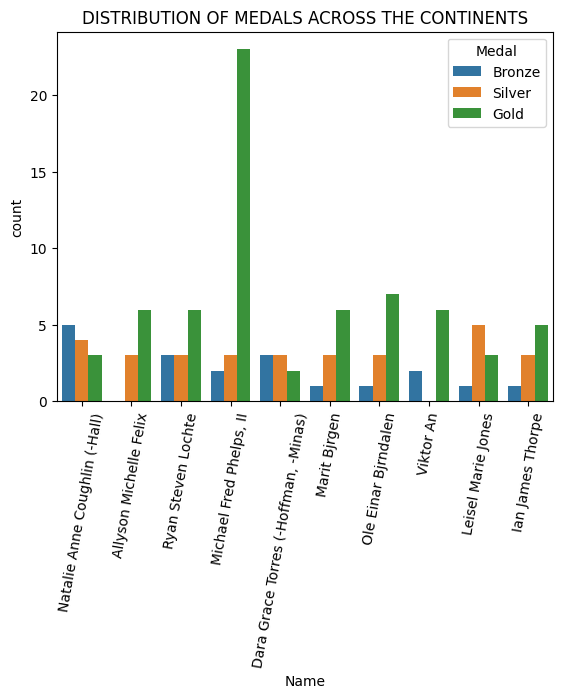

ID              total
Medal                                            Bronze  Gold Silver      
Name                                 region                               
Michael Fred Phelps, II              USA            2.0  23.0    3.0  28.0
Natalie Anne Coughlin (-Hall)        USA            5.0   3.0    4.0  12.0
Ryan Steven Lochte                   USA            3.0   6.0    3.0  12.0
Ole Einar Bjrndalen                  Norway         1.0   7.0    3.0  11.0
Marit Bjrgen                         Norway         1.0   6.0    3.0  10.0
Allyson Michelle Felix               USA            0.0   6.0    3.0   9.0
Ian James Thorpe                     Australia      1.0   5.0    3.0   9.0
Leisel Marie Jones                   Australia      1.0   3.0    5.0   9.0
Dara Grace Torres (-Hoffman, -Minas) USA            3.0   2.0    3.0   8.0
Viktor An                            Russia         1.0   3.0    0.0   4.0
                                     South Korea    1.0   3.0    0.0   4.0

In [36]:
sns.countplot(x=top_athletes_df['Name'], hue=top_athletes_df['Medal'])
plt.xticks(rotation=80)
plt.title('DISTRIBUTION OF MEDALS ACROSS THE CONTINENTS')
plt.show()

pivot_table

In [37]:
modern_sports.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'continent'],
      dtype='object')

In [38]:
#dropping unnecessary columns
countries = ['NOC', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Year', 'Sport', 'Medal']
for i in modern_sports.columns:
    if i not in countries:
        modern_sports.drop(i, axis = 1, inplace=True)

<ipython-input-38-839d9f3e1aab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_sports.drop(i, axis = 1, inplace=True)
<ipython-input-38-839d9f3e1aab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_sports.drop(i, axis = 1, inplace=True)
<ipython-input-38-839d9f3e1aab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern_sports.drop(i, axis = 1, inplace=True)
<ipython-input-38-839d9f3e1aab>:5: SettingWithCopyWarning:

In [39]:
modern_sports

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
1,A Lamusi,1,23.0,170.0,60.0,CHN,2012,Judo,NaN
2,Abudoureheman,1,22.0,182.0,75.0,CHN,2000,Boxing,NaN
3,Ai Linuer,1,25.0,160.0,62.0,CHN,2004,Wrestling,NaN
4,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
5,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
...,...,...,...,...,...,...,...,...,...
270760,Likeleli Alinah Thamae,0,22.0,170.0,49.0,LES,2000,Taekwondo,NaN
270761,Masempe Theko,0,25.0,NaN,NaN,LES,2012,Swimming,NaN
270762,Mamorallo Tjoka,0,23.0,150.0,56.0,LES,2008,Athletics,NaN
270763,Mamorallo Tjoka,0,27.0,150.0,56.0,LES,2012,Athletics,NaN


In [40]:
df = modern_sports.copy()

In [41]:
#filtering for only gold medal winners
df1 = modern_sports[modern_sports['Medal'] == 'Gold']

Text(0.5, 1.0, 'Top 20 Countries with the most gold medals')

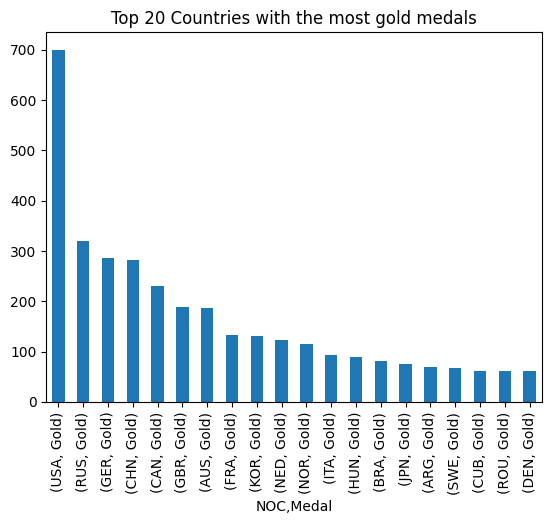

In [42]:
dff = df1.groupby('NOC').Medal.value_counts().sort_values(ascending=False)[:20]#top 20
dff.plot(kind='bar')
plt.title('Top 20 Countries with the most gold medals')

In [43]:
#filtering top 10 NOC
NOC = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df1 = df1[(df1['NOC'] == NOC[0]) | (df1['NOC'] == NOC[1]) | (df1['NOC'] == NOC[2]) | (df1['NOC'] == NOC[3]) | (df1['NOC'] == NOC[4]) | (df1['NOC'] == NOC[5]) | (df1['NOC'] == NOC[6]) | (df1['NOC'] == NOC[7]) | (df1['NOC'] == NOC[8]) | (df1['NOC'] == NOC[9])]

In [44]:
df1.describe()

,Sex,Age,Height,Weight,Year
count,2581.000000,2581.000000,2579.000000,2569.000000,2581.000000
mean,0.490895,25.996126,178.013959,73.659595,2008.203797
std,0.500014,5.257625,11.395042,15.617209,5.436055
min,0.000000,15.000000,137.000000,28.000000,2000.000000
25%,0.000000,22.000000,170.000000,62.000000,2004.000000
50%,0.000000,25.000000,178.000000,72.000000,2008.000000
75%,1.000000,29.000000,185.000000,84.000000,2012.000000
max,1.000000,58.000000,219.000000,146.000000,2016.000000


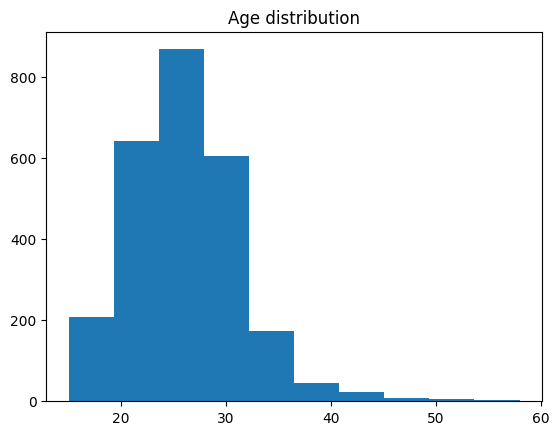

In [45]:
df1['Age'].hist()
plt.title('Age distribution')
plt.grid(visible=False)

From the histogram above, most athletes who won a gold medal from the top 10 countries are in their mid 20s

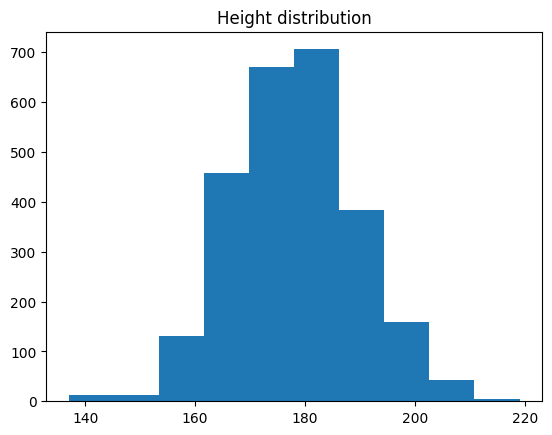

In [46]:
df1['Height'].hist()
plt.title('Height distribution')
plt.grid(visible=False)

this shows the distribution of height among athletes from the top 20 countries and their heights mostly is over 180m

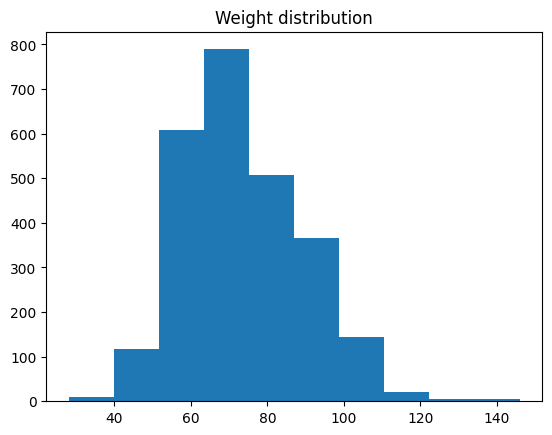

In [47]:
df1['Weight'].hist()
plt.title('Weight distribution')
plt.grid(visible=False)

their weight distribution is mostly around 70kg, i'll try to check each of these by countries and narrow my cateorization

In [48]:
df_copy = df1.copy()

In [49]:
# Define the thresholds for height, age, and weight
thresholds = {
    'Height': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    },
    'Age': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    },
    'Weight': {
        'high': 0.75,
        'mid': 0.5,
        'low': 0.25
    }
}

# Define a function to categorize a column based on its thresholds
def categorize_column(column):
    column_name = column.name
    column_thresholds = thresholds[column_name]

    def categorize(x):
        if x >= column.quantile(column_thresholds['high']):
            return 'high'
        elif x >= column.quantile(column_thresholds['mid']):
            return 'mid'
        else:
            return 'low'

    return column.apply(categorize)

# Apply the categorization function to the respective columns
df_copy['height_category'] = categorize_column(df_copy['Height'])
df_copy['age_category'] = categorize_column(df_copy['Age'])
df_copy['weight_category'] = categorize_column(df_copy['Weight'])


from the above function, i set a threshold for each of these variable, any variable equal or below it's 20th percentile is marked as low, those at 50 percentile is mid and those equal or over 75th percentile is labeled as high

In [50]:
df_copy

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal,height_category,age_category,weight_category
68,Cai Yalin,1,23.0,174.0,60.0,CHN,2000,Shooting,Gold,low,low,low
77,Cai Yun,1,32.0,181.0,68.0,CHN,2012,Badminton,Gold,mid,high,low
87,Cao Lei,0,24.0,168.0,75.0,CHN,2008,Weightlifting,Gold,low,low,mid
104,Cao Yuan,1,17.0,160.0,42.0,CHN,2012,Diving,Gold,low,low,low
105,Cao Yuan,1,21.0,160.0,42.0,CHN,2016,Diving,Gold,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...
256120,Yu Seung-Min,1,22.0,178.0,72.0,KOR,2004,Table Tennis,Gold,mid,low,mid
256184,Yun Mi-Jin,0,17.0,167.0,55.0,KOR,2000,Archery,Gold,low,low,low
256185,Yun Mi-Jin,0,17.0,167.0,55.0,KOR,2000,Archery,Gold,low,low,low
256187,Yun Mi-Jin,0,21.0,167.0,55.0,KOR,2004,Archery,Gold,low,low,low


Text(0.5, 1.0, 'Weight categories of top 10 countries')

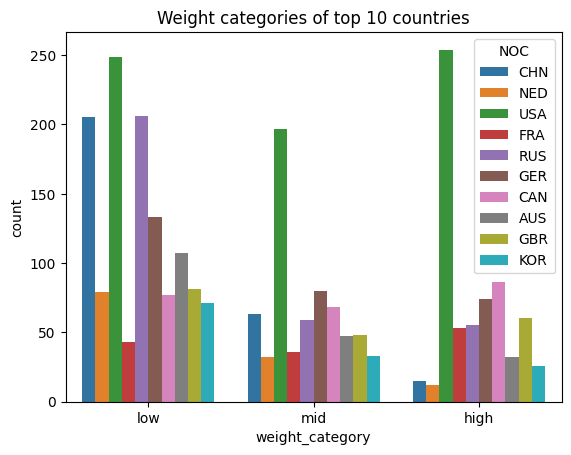

In [51]:
sns.countplot(df_copy, x='weight_category', hue='NOC')
plt.title('Weight categories of top 10 countries')

from the chart above shows the weight category of athletes from the top 10 countries

Text(0.5, 1.0, 'Height categories of top 10 countries')

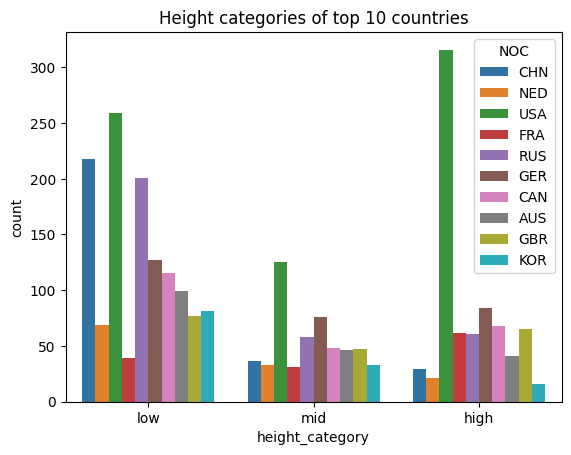

In [52]:
sns.countplot(df_copy, x='height_category', hue='NOC')
plt.title('Height categories of top 10 countries')

from the chart above shows the height category of athletes from the top 10 countries

Text(0.5, 1.0, 'Age categories of top 10 countries')

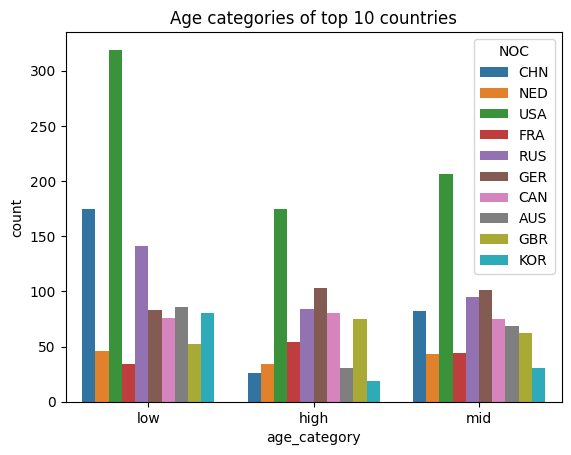

In [53]:
sns.countplot(df_copy, x='age_category', hue='NOC')
plt.title('Age categories of top 10 countries')

from the chart above shows the Age category of athletes from the top 10 countries

In [54]:
df

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
1,A Lamusi,1,23.0,170.0,60.0,CHN,2012,Judo,NaN
2,Abudoureheman,1,22.0,182.0,75.0,CHN,2000,Boxing,NaN
3,Ai Linuer,1,25.0,160.0,62.0,CHN,2004,Wrestling,NaN
4,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
5,Ai Yanhan,0,14.0,168.0,54.0,CHN,2016,Swimming,NaN
...,...,...,...,...,...,...,...,...,...
270760,Likeleli Alinah Thamae,0,22.0,170.0,49.0,LES,2000,Taekwondo,NaN
270761,Masempe Theko,0,25.0,NaN,NaN,LES,2012,Swimming,NaN
270762,Mamorallo Tjoka,0,23.0,150.0,56.0,LES,2008,Athletics,NaN
270763,Mamorallo Tjoka,0,27.0,150.0,56.0,LES,2012,Athletics,NaN


to train the model, i'll deal with text by mapping only the top ten countries with numbers 0-9 and also the medal with 1-3, all null values will be dropped and the medal will be our target varieble.

In [55]:
#filtering top 10 NOC
NOC = ['USA', 'RUS', 'GER', 'CHN', 'CAN', 'GBR', 'AUS', 'FRA', 'KOR', 'NED']
df = df[(df['NOC'] == NOC[0]) | (df['NOC'] == NOC[1]) | (df['NOC'] == NOC[2]) | (df['NOC'] == NOC[3]) | (df['NOC'] == NOC[4]) | (df['NOC'] == NOC[5]) | (df['NOC'] == NOC[6]) | (df['NOC'] == NOC[7]) | (df['NOC'] == NOC[8]) | (df['NOC'] == NOC[9])]

In [56]:
#mapping countries with number for model training
df['NOC'] = df['NOC'].map({'USA':1, 'RUS':2, 'GER':3, 'CHN':4, 'CAN':5, 'GBR':6, 'AUS':7, 'FRA':8, 'KOR':9, 'NED':10})

<ipython-input-56-b80986a72480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOC'] = df['NOC'].map({'USA':1, 'RUS':2, 'GER':3, 'CHN':4, 'CAN':5, 'GBR':6, 'AUS':7, 'FRA':8, 'KOR':9, 'NED':10})


In [57]:
df['Medal'] = df['Medal'].map({'Gold':1, 'Silver':2, 'Bronze':3})

<ipython-input-57-6ce0e3538ca9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Medal'] = df['Medal'].map({'Gold':1, 'Silver':2, 'Bronze':3})


In [58]:
df

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
1,A Lamusi,1,23.0,170.0,60.0,4,2012,Judo,NaN
2,Abudoureheman,1,22.0,182.0,75.0,4,2000,Boxing,NaN
3,Ai Linuer,1,25.0,160.0,62.0,4,2004,Wrestling,NaN
4,Ai Yanhan,0,14.0,168.0,54.0,4,2016,Swimming,NaN
5,Ai Yanhan,0,14.0,168.0,54.0,4,2016,Swimming,NaN
...,...,...,...,...,...,...,...,...,...
256200,Yun Seong-Bin,1,19.0,178.0,85.0,9,2014,Skeleton,NaN
256201,Yun Seong-Hun,1,25.0,177.0,73.0,9,2008,Hockey,NaN
256202,Yun Seong-Hun,1,29.0,177.0,73.0,9,2012,Hockey,NaN
256203,Yun Seung-Hyun,1,22.0,193.0,75.0,9,2016,Athletics,NaN


In [59]:
df.isna().sum()

Name          0
Sex           0
Age           0
Height       45
Weight      174
NOC           0
Year          0
Sport         0
Medal     24661
dtype: int64

In [60]:
df.dropna(inplace=True)

<ipython-input-60-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [61]:
df

,Name,Sex,Age,Height,Weight,NOC,Year,Sport,Medal
11,An Yulong,1,23.0,173.0,70.0,4,2002,Short Track Speed Skating,3.0
33,Bao Yingying,0,24.0,172.0,67.0,4,2008,Fencing,2.0
63,Cai Tongtong,0,18.0,168.0,48.0,4,2008,Rhythmic Gymnastics,2.0
68,Cai Yalin,1,23.0,174.0,60.0,4,2000,Shooting,1.0
76,Cai Yun,1,28.0,181.0,68.0,4,2008,Badminton,2.0
...,...,...,...,...,...,...,...,...,...
256185,Yun Mi-Jin,0,17.0,167.0,55.0,9,2000,Archery,1.0
256187,Yun Mi-Jin,0,21.0,167.0,55.0,9,2004,Archery,1.0
256195,Yun Ok-Hui,0,23.0,162.0,63.0,9,2008,Archery,3.0
256196,Yun Ok-Hui,0,23.0,162.0,63.0,9,2008,Archery,1.0


In [62]:
df.drop(['Name', 'Year', 'Sport'], inplace=True, axis=1)

<ipython-input-62-a7c4d1500ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Name', 'Year', 'Sport'], inplace=True, axis=1)


In [63]:
df

,Sex,Age,Height,Weight,NOC,Medal
11,1,23.0,173.0,70.0,4,3.0
33,0,24.0,172.0,67.0,4,2.0
63,0,18.0,168.0,48.0,4,2.0
68,1,23.0,174.0,60.0,4,1.0
76,1,28.0,181.0,68.0,4,2.0
...,...,...,...,...,...,...
256185,0,17.0,167.0,55.0,9,1.0
256187,0,21.0,167.0,55.0,9,1.0
256195,0,23.0,162.0,63.0,9,3.0
256196,0,23.0,162.0,63.0,9,1.0


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

In [65]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Medal', axis=1)
y = df['Medal']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5527, 5) (5527,)
Testing set shape: (1382, 5) (1382,)


In [66]:
Linear_model = LinearRegression()

# Fit the model to the data
Linear_model.fit(X, y)

# Predict the target values
y_pred = Linear_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6966064551467872
Root Mean Squared Error (RMSE): 0.822861928134962
R-squared (R2): 0.002585875269372706


In [67]:
# Create a decision tree regressor
DTR_model = DecisionTreeRegressor()

# Fit the model to the data
DTR_model.fit(X, y)

# Predict the target values
y_pred = DTR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.104748120119375
Root Mean Squared Error (RMSE): 0.28432988284103355
R-squared (R2): 0.8809123875628149


In [71]:
# Create a Random Forest Regressor
RFR_model = RandomForestRegressor(max_features=1, min_samples_split=2, n_jobs=400)

# Fit the model to the data
RFR_model.fit(X, y)

# Predict the target values
y_pred = RFR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.30925879028584574
Root Mean Squared Error (RMSE): 0.39399495753624914
R-squared (R2): 0.7713333110257568


In [69]:
GBR_model = GradientBoostingRegressor()

# Fit the model to the data
GBR_model.fit(X, y)

# Predict the target values
y_pred = GBR_model.predict(X)

# Calculate the evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 0.6745702267880227
Root Mean Squared Error (RMSE): 0.7911795098663277
R-squared (R2): 0.0779135531433095
